In [1]:
import torch 
import torchvision
from torchvision import transforms,datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


In [2]:

'''
batch_size: defined size of samples in one data, that means all 6000 samples seperated into 600 parts.
'''
trainset = torch.utils.data.DataLoader(train,batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test,batch_size = 10, shuffle = True)

In [3]:
class Net(nn.Module):
	def __init__(self):
		super().__init__()
		'''
		build a rough a neural network with 4 fully connected layers
		nn.Linear(input layer, output layer)		
		28*28, cos out input image is 28*28
		output is 10, cos we got 0~9, total 10 labels
		'''

		self.fc1 = nn.Linear(28*28,64)
		self.fc2 = nn.Linear(64,64)
		self.fc3 = nn.Linear(64,64)
		self.fc4 = nn.Linear(64,10)

	'''
	build neural network struture, and add activation funtion between layers
	we put softmax function at the end of layers when we dealing with classification problems, cos softmax distribute between 0 and 1.

	'''
	def forward(self,x):
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = F.relu(self.fc3(x))
		x = self.fc4(x)
		# dim = 1 , cos the output is one dimension.
		return F.log_softmax(x,dim=1)

In [4]:
net = Net()

optimizer = optim.Adam(net.parameters(),lr=0.001)

# train our trainset three times
EPOCHS = 3

'''
train our neural network
'''
for epoch in range(EPOCHS):
	for data in trainset:
		#data is batch of featuresets and labels
		X, y = data
		net.zero_grad()
		output = net(X.view(-1,28*28))
		loss = F.nll_loss(output,y)
		loss.backward()
		optimizer.step()


In [5]:
# calculate the accurany of our model
correct = 0
total = 0
with torch.no_grad():
	for data in trainset:
		X,y = data 
		output = net(X.view(-1,28*28))
		for idx, i in enumerate(output):
			if torch.argmax(i) == y[idx]:
				correct += 1
			total += 1

print("Accurancy: ",round(correct/total,3))


Accurancy:  0.98


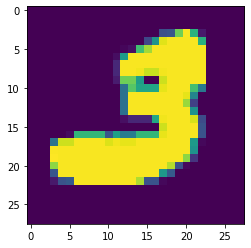

In [6]:
plt.imshow(X[9].view(28,28))
plt.show()

In [7]:
print(torch.argmax(net(X[9].view(-1,28*28))))

tensor(3, grad_fn=<NotImplemented>)
